In [1]:
##### Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
import pandas as pd
from dragons import meraxes, munge
import random
import sys
from Functions import *
import statistics 
import seaborn as sns

#get gals, snaps, sims_props
snapshot_used0 = 250 # z = 0

#gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True, pandas=True)
gals0, sim_props0, snaplist0 = get_gal_catalogue(snapshot_used0)
snaplist_index_used0 = list(snaplist0[0]).index(snapshot_used0)# convert to list and find the index of the snap we are using
redshift_used0 = snaplist0[1][snaplist_index_used0] # Get the redshift for corresponding snapshot
redshift_used0 = str(round(redshift_used0, 1)) # round float to nearest whole int

print("snaps available: ", snaplist0[0])
# Log the masses : CONERT TO PROPER UNITS
gals0["HIMass"] = np.log10(gals0["HIMass"]*1e10)
gals0["Mvir"] = np.log10(gals0["Mvir"]*1e10)

Type0 = gals0["Type"]

#gals.describe()# summarise the stats of HIMass
#gals_ran.shape # returns number of galaxies
#gals.dtypes #returns types of available properties
#gals.columns #returns all avaiable properties of galxies

# remove infs
gals0[gals0.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
# drop nan values
gals0.dropna()

snaps available:  [100 115 134 158 173 192 216 250]


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,HaloID,ID,Type,CentralGal,GhostFlag,Len,MaxLen,Spin,Mvir,Rvir,...,Pos_1,Pos_2,Vel_0,Vel_1,Vel_2,NewStars_0,NewStars_1,NewStars_2,NewStars_3,NewStars_4
0,11891,160003467489,2,111,0,136,74498,0.045432,10.410791,0.051654,...,95.357613,104.576927,67.298050,441.328613,938.794434,5.499211e-05,6.507500e-05,2.238881e-05,2.445957e-05,2.684530e-05
1,15039,160002967963,2,1459,0,125,49597,0.022985,10.374162,0.048882,...,80.398964,126.852463,74.069534,543.028748,-122.469131,2.497679e-05,6.240261e-06,7.028243e-06,7.988126e-06,9.170350e-06
2,17691,170000017691,1,4133,0,1807,71594,0.006391,11.534210,0.121856,...,51.996937,113.232567,-930.991577,-52.528320,-214.932236,1.665010e-05,2.308562e-05,2.897531e-05,1.898422e-05,8.637647e-05
3,2384,170000002384,1,3224,0,51,7477,0.034749,9.984822,0.037101,...,91.075577,117.257355,-240.686813,643.402527,-765.090332,5.238098e-09,5.364278e-08,6.944277e-09,4.393253e-09,1.006935e-08
4,16775,170001364278,2,119,0,125,287077,0.024372,10.374162,0.050221,...,48.636635,113.815613,-6.457941,301.344849,190.143799,3.310987e-05,4.494816e-05,6.234943e-05,1.286202e-05,1.495648e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643838,1273328,2490001273328,0,1643838,0,32,32,0.070417,9.782402,0.031762,...,13.856137,153.014206,-0.857207,-36.879787,-32.609779,1.387533e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1643839,1273316,2490001273316,0,1643839,0,32,32,0.040942,9.782402,0.031762,...,110.860130,147.691803,-321.656799,-265.737122,-285.076477,1.002455e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1643840,1273376,2490001273376,0,1643840,0,32,32,0.032930,9.782402,0.031762,...,57.087086,162.020309,-57.180035,-123.013000,-238.903046,3.312024e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1643841,1273403,2490001273403,0,1643841,0,32,32,0.048263,9.782402,0.031762,...,130.345978,79.470665,-298.696106,-221.048767,154.799164,1.321928e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [2]:
# Separate centr gals["Mvir"]als and satellites
Mvir_Cen0 = gals0["Mvir"][Type0==0]
Mvir_Sat0 = gals0["Mvir"][Type0==1]
Mvir_Orp0 = gals0["Mvir"][Type0==2]

HIMass_Cen0 = gals0["HIMass"][Type0==0]
HIMass_Sat0 = gals0["HIMass"][Type0==1]
HIMass_Orp0 = gals0["HIMass"][Type0==2]

nbins = 10

In [3]:
# ALL GALAXIES
# Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
gals0["Mvir_group"] = pd.cut(gals0["Mvir"], bins=nbins)

# Group galaxies by Mvir_group 
grouped0 = gals0.groupby("Mvir_group")

# Get parameters of each group and save as results_df
results_df_HIMass0 = grouped0["HIMass"].agg(["mean", "median", "std", "size"])
results_df_Mvir0 = grouped0["Mvir"].agg(["mean", "median", "std", "size"])

#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

Mvir_mean0 = results_df_Mvir0["mean"]
Mvir_std0 = results_df_Mvir0["std"]

HIMass_median0 = results_df_HIMass0['median']
HIMass_std0 = results_df_HIMass0["std"]

# drop nan values
Mvir_mean0.dropna()
Mvir_std0.dropna()
HIMass_median0.dropna()
HIMass_std0.dropna()


Mvir_group
(11.444, 11.997]    0.894658
(11.997, 12.551]    1.119701
(12.551, 13.105]    0.722109
(13.105, 13.659]    0.615788
(13.659, 14.212]    0.889133
(14.212, 14.766]    0.911206
(14.766, 15.32]     1.061458
Name: std, dtype: float64

In [4]:
# Centrals
# Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
gals0["Mvir_group_Cen"] = pd.cut(Mvir_Cen0, bins=nbins)

# Group galaxies by Mvir_group 
grouped_Cen0 = gals0.groupby("Mvir_group_Cen")

# Get parameters of each group and save as results_df
results_df_HIMass_Cen0 = grouped_Cen0["HIMass"].agg(["mean", "median", "std", "size"])
results_df_Mvir_Cen0 = grouped_Cen0["Mvir"].agg(["mean", "median", "std", "size"])
#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

Mvir_mean_Cen0 = results_df_Mvir_Cen0["mean"]
Mvir_std_Cen0 = results_df_Mvir_Cen0["std"]

HIMass_median_Cen0 = results_df_HIMass_Cen0['median']
HIMass_std_Cen0 = results_df_HIMass_Cen0["std"]

# drop nan values
Mvir_mean_Cen0.dropna()
Mvir_std_Cen0.dropna()
HIMass_median_Cen0.dropna()
HIMass_std_Cen0.dropna()


Mvir_group_Cen
(10.336, 10.89]     0.447762
(10.89, 11.444]     0.669720
(11.444, 11.997]    0.822894
(11.997, 12.551]    1.127360
(12.551, 13.105]    0.704035
(13.105, 13.659]    0.602849
(13.659, 14.212]    0.738616
(14.212, 14.766]    0.809864
(14.766, 15.32]     0.613267
Name: std, dtype: float64

In [5]:
# SATELLITES
# Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
gals0["Mvir_group_Sat"] = pd.cut(Mvir_Sat0, bins=nbins)

# Group galaxies by Mvir_group 
grouped_Sat0 = gals0.groupby("Mvir_group_Sat")

# Get parameters of each group and save as results_df
results_df_HIMass_Sat0 = grouped_Sat0["HIMass"].agg(["mean", "median", "std", "size"])
results_df_Mvir_Sat0 = grouped_Sat0["Mvir"].agg(["mean", "median", "std", "size"])
#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

Mvir_mean_Sat0 = results_df_Mvir_Sat0["mean"]
Mvir_std_Sat0 = results_df_Mvir_Sat0["std"]

HIMass_median_Sat0 = results_df_HIMass_Sat0['median']
HIMass_std_Sat0 = results_df_HIMass_Sat0["std"]

# drop nan values
Mvir_mean_Sat0.dropna()
Mvir_std_Sat0.dropna()
HIMass_median_Sat0.dropna()
HIMass_std_Sat0.dropna()


Mvir_group_Sat
(10.679, 11.128]    0.894300
(11.576, 12.024]    0.955616
(12.024, 12.473]    0.923504
(12.473, 12.921]    0.777400
(12.921, 13.37]     0.614584
(13.37, 13.818]     0.630564
(13.818, 14.266]    0.678434
Name: std, dtype: float64

In [6]:
# ORPHANS
# Split the data into nbins quantiles (varies bin width to keep same number of data points in each bin)
gals0["Mvir_group_Orp"] = pd.cut(Mvir_Orp0, bins=nbins)

# Group galaxies by Mvir_group 
grouped_Orp0 = gals0.groupby("Mvir_group_Orp")

# Get parameters of each group and save as results_df
results_df_HIMass_Orp0 = grouped_Orp0["HIMass"].agg(["mean", "median", "std", "size"])# returns the HI mass mean in HI mass group
results_df_Mvir_Orp0 = grouped_Orp0["Mvir"].agg(["mean", "median", "std", "size"]) # returns the Mvir mean in Mvir group
 
#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

Mvir_mean_Orp0 = results_df_Mvir_Orp0["mean"]
Mvir_std_Orp0 = results_df_Mvir_Orp0["std"]

HIMass_median_Orp0 = results_df_HIMass_Orp0['median']
HIMass_std_Orp0 = results_df_HIMass_Orp0["std"]

# drop nan values
Mvir_mean_Orp0.dropna()
Mvir_std_Orp0.dropna()
HIMass_median_Orp0.dropna()
HIMass_std_Orp0.dropna()


Mvir_group_Orp
(10.296, 10.809]    0.923639
(10.809, 11.322]    0.966993
(11.322, 11.835]    0.886419
(11.835, 12.349]    1.189036
(12.349, 12.862]    1.233432
(12.862, 13.375]    0.960077
(13.375, 13.888]    1.247403
(13.888, 14.402]    1.012795
(14.402, 14.915]    1.619852
Name: std, dtype: float64

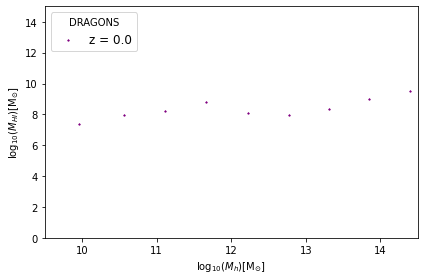

In [7]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)
label_z0 = ("z = " + redshift_used0)

plot = ax.scatter(Mvir_mean0, HIMass_median0, color= "purple", marker= "*", s=2, label=label_z0)  
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper left',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()
nbins = str(nbins)
redshift_used0 = str(redshift_used0)
name_of_plot=("Alice_MHI_Mvir_" + nbins + "_scatter" + redshift_used0)
plt.savefig("plots/" + name_of_plot + ".pdf")

In [8]:
MVir_mean_test = grouped0["Mvir"].mean()

HIMass_median_test = grouped0["HIMass"].median()
HIMass_std_test = grouped0["HIMass"].std()


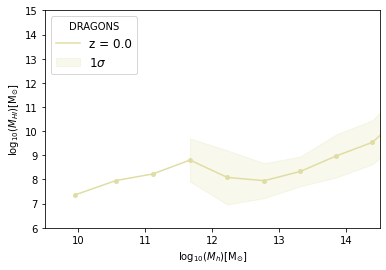

In [9]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
label_sigma0 = ("$1\sigma$")
color_used=np.random.rand(3,)
ax.plot(Mvir_mean0, HIMass_median0, color=color_used, label=label_z0)
ax.scatter(Mvir_mean0, HIMass_median0, color=color_used, marker='o', s=15)
ax.fill_between(MVir_mean_test, 
                HIMass_median_test - HIMass_std_test, 
                HIMass_median_test + HIMass_std_test, 
                alpha=0.2, color =color_used, label=label_sigma0)

plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

name_of_plot=("Alice_MHI_Mvir_" + nbins + "_shaded_z-" + redshift_used0)
plt.savefig("plots/" + name_of_plot + ".pdf")

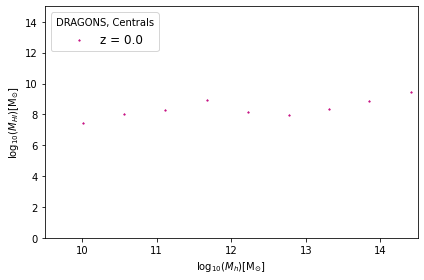

In [10]:
#CENTRALS
fig, ax = plt.subplots(1, 1)

plot = ax.scatter(Mvir_mean_Cen0, HIMass_median_Cen0, color= "mediumvioletred", marker= "*", s=2, label=label_z0)  
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
# Add the legend
plt.legend(title=("DRAGONS, Centrals"),
           loc='upper left',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()
name_of_plot=("Alice_MHI_Mvir_" + nbins + "_scatter_Cen" + redshift_used0)
plt.savefig("plots/" + name_of_plot + ".pdf")

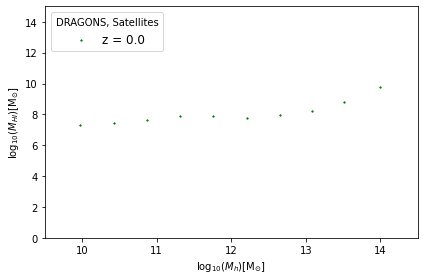

In [11]:
#SATELLITES
fig, ax = plt.subplots(1, 1)

plot = ax.scatter(Mvir_mean_Sat0, HIMass_median_Sat0, color= "green", marker= "*", s=2, label=label_z0)  
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
# Add the legend
plt.legend(title=("DRAGONS, Satellites"),
           loc='upper left',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()
name_of_plot=("Alice_MHI_Mvir_" + nbins + "_scatter_Sat" + redshift_used0)
plt.savefig("plots/" + name_of_plot + ".pdf")

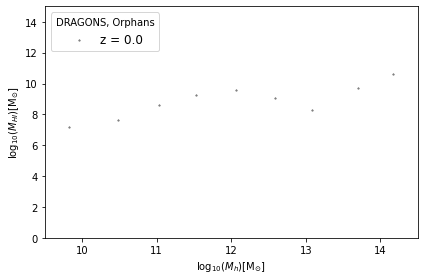

In [12]:
#ORPHANS
fig, ax = plt.subplots(1, 1)

plot = ax.scatter(Mvir_mean_Orp0, HIMass_median_Orp0, color= "grey", marker= "*", s=2, label=label_z0)  
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
# Add the legend
plt.legend(title=("DRAGONS, Orphans"),
           loc='upper left',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()
name_of_plot=("Alice_MHI_Mvir_" + nbins + "_scatter_Orp" + redshift_used0)
plt.savefig("plots/" + name_of_plot + ".pdf")

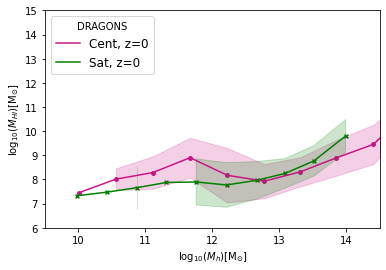

In [13]:
# CENTRALS, SATELLITES AND ORPHANS
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
label_sigma = ("$1\sigma$ for All Galaxies")
label_Cen0=("Cent, z=0")
label_Sat0=("Sat, z=0")
label_Orp0=("Orp, z=0")

ax.plot(Mvir_mean_Cen0, HIMass_median_Cen0, color="mediumvioletred", label=label_Cen0)
ax.scatter(Mvir_mean_Cen0, HIMass_median_Cen0, color="mediumvioletred", marker='o', s=15)
ax.plot(Mvir_mean_Sat0, HIMass_median_Sat0, color="green", label=label_Sat0)
ax.scatter(Mvir_mean_Sat0, HIMass_median_Sat0, color="green", marker='x', s=15)
#ax.plot(Mvir_mean_Orp, HIMass_median_Orp, color="grey", label=label_Orp0)

'''ax.fill_between(Mvir_mean, 
                HIMass_median - HIMass_std, 
                HIMass_median + HIMass_std, 
                alpha=0.2, color =color_used)
'''
ax.fill_between(Mvir_mean_Cen0, 
                HIMass_median_Cen0 - HIMass_std_Cen0, 
                HIMass_median_Cen0 + HIMass_std_Cen0, 
                alpha=0.2, color ="mediumvioletred")

ax.fill_between(Mvir_mean_Sat0, 
                HIMass_median_Sat0 - HIMass_std_Sat0, 
                HIMass_median_Sat0 + HIMass_std_Sat0, 
                alpha=0.2, color ="green")

'''
ax.fill_between(Mvir_mean_Orp0, 
                HIMass_median_Orp0 - HIMass_std_Orp0, 
                HIMass_median_Orp0 + HIMass_std_Orp0, 
                alpha=0.2, color ="grey", label=label_sigma)
'''
plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

name_of_plot=("Alice_MHI_Mvir_" + nbins + "_shaded_z-" + redshift_used0 + "Cen_Sat_Orp")
plt.savefig("plots/" + name_of_plot + ".pdf")

# z=1

In [14]:
snaplist0[0]
nbins = int(nbins)
nbins

10

In [15]:
#get gals, snaps, sims_props
snapshot_used1 = 192 # z = 1

#gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True, pandas=True)
gals1, sim_props1, snaplist1 = get_gal_catalogue(snapshot_used1)
snaplist_index_used1 = list(snaplist1[0]).index(snapshot_used1)# convert to list and find the index of the snap we are using
redshift_used1 = snaplist1[1][snaplist_index_used1] # Get the redshift for corresponding snapshot
redshift_used1 = str(round(redshift_used1, 1)) # round float to nearest whole int

print("snaps available: ", snaplist1[0])
# Log the masses : CONERT TO PROPER UNITS
gals1["HIMass"] = np.log10(gals1["HIMass"]*1e10)
gals1["Mvir"] = np.log10(gals1["Mvir"]*1e10)

Type1 = gals1["Type"]

#gals.describe()# summarise the stats of HIMass
#gals_ran.shape # returns number of galaxies
#gals.dtypes #returns types of available properties
#gals.columns #returns all avaiable properties of galxies

# remove infs
gals1[gals1.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
# drop nan values
gals1.dropna()

snaps available:  [100 115 134 158 173 192 216 250]


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,HaloID,ID,Type,CentralGal,GhostFlag,Len,MaxLen,Spin,Mvir,Rvir,...,Pos_1,Pos_2,Vel_0,Vel_1,Vel_2,NewStars_0,NewStars_1,NewStars_2,NewStars_3,NewStars_4
0,7385,140003303477,1,51,0,11835,208884,0.010106,12.350420,0.183421,...,47.136967,135.951187,324.236267,-122.215324,-77.624054,6.676361e-03,0.007015,0.007789,0.008896,0.009786
1,1376273,160003467489,1,55,0,1005,74498,0.018741,11.279418,0.080621,...,94.201485,98.119835,-1966.310181,-159.271454,1243.031128,5.003766e-04,0.000527,0.000206,0.000088,0.000146
2,5487,160000005487,1,5920,0,85763,126133,0.012604,13.210552,0.354944,...,1.327000,108.132454,-406.650238,-298.552704,-228.917786,9.301374e-03,0.009633,0.010232,0.011004,0.012652
3,1562010,160002967963,1,2077,0,3202,49597,0.024359,11.782674,0.118632,...,77.080452,127.532700,728.382996,1673.961060,-742.860840,7.343457e-03,0.006395,0.007344,0.009386,0.008462
4,17691,170000017691,1,5827,0,61003,71594,0.041801,13.062603,0.316843,...,53.558224,112.862488,-216.260437,-453.921753,615.249634,2.466715e-05,0.000031,0.000028,0.000020,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859864,1156027,1910001156027,0,1859864,0,35,35,0.063773,9.821320,0.026328,...,175.981033,112.001381,-172.783142,229.870743,-170.761551,5.738222e-10,0.000000,0.000000,0.000000,0.000000
1859865,1119587,1910001119587,0,1859865,0,33,33,0.067511,9.795766,0.025817,...,52.807598,150.991760,-98.991348,-44.434410,-415.702698,8.395898e-12,0.000000,0.000000,0.000000,0.000000
1859866,1256200,1910001256200,0,1859866,0,36,36,0.059644,9.833555,0.026576,...,86.722923,162.523376,-211.620926,234.702301,-90.145691,2.228336e-09,0.000000,0.000000,0.000000,0.000000
1859872,956274,1910000956274,0,1859872,0,33,33,0.037704,9.795766,0.025817,...,138.370697,86.391884,-186.694946,-186.939072,231.344543,2.254766e-08,0.000000,0.000000,0.000000,0.000000


In [16]:
# Separate centr gals["Mvir"]als and satellites
Mvir_Cen1 = gals1["Mvir"][Type1==0]
Mvir_Sat1 = gals1["Mvir"][Type1==1]
Mvir_Orp1 = gals1["Mvir"][Type1==2]

HIMass_Cen1 = gals1["HIMass"][Type1==0]
HIMass_Sat1 = gals1["HIMass"][Type1==1]
HIMass_Orp1 = gals1["HIMass"][Type1==2]


In [17]:
# ALL GALAXIES
# Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
gals1["Mvir_group"] = pd.cut(gals1["Mvir"], bins=nbins)

# Group galaxies by Mvir_group 
grouped1 = gals1.groupby("Mvir_group")

# Get parameters of each group and save as results_df
results_df_HIMass1 = grouped1["HIMass"].agg(["mean", "median", "std", "size"])
results_df_Mvir1 = grouped1["Mvir"].agg(["mean", "median", "std", "size"])

#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

Mvir_mean1 = results_df_Mvir1["mean"]
Mvir_std1 = results_df_Mvir1["std"]

HIMass_median1 = results_df_HIMass1['median']
HIMass_std1 = results_df_HIMass1["std"]

# drop nan values
Mvir_mean1.dropna()
Mvir_std1.dropna()
HIMass_median1.dropna()
HIMass_std1.dropna()


Mvir_group
(11.162, 11.621]    1.042857
(11.621, 12.081]    1.212110
(12.081, 12.541]    1.280644
(12.541, 13.0]      1.035615
(13.0, 13.46]       0.922483
(13.46, 13.92]      0.880188
(13.92, 14.38]      0.866569
Name: std, dtype: float64

In [18]:
# Centrals
# Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
gals1["Mvir_group_Cen"] = pd.cut(Mvir_Cen1, bins=nbins)

# Group galaxies by Mvir_group 
grouped_Cen1 = gals1.groupby("Mvir_group_Cen")

# Get parameters of each group and save as results_df
results_df_HIMass_Cen1 = grouped_Cen1["HIMass"].agg(["mean", "median", "std", "size"])
results_df_Mvir_Cen1 = grouped_Cen1["Mvir"].agg(["mean", "median", "std", "size"])
#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows

Mvir_mean_Cen1 = results_df_Mvir_Cen1["mean"]
Mvir_std_Cen1 = results_df_Mvir_Cen1["std"]

HIMass_median_Cen1 = results_df_HIMass_Cen1['median']
HIMass_std_Cen1 = results_df_HIMass_Cen1["std"]

# drop nan values
Mvir_mean_Cen1.dropna()
Mvir_std_Cen1.dropna()
HIMass_median_Cen1.dropna()
HIMass_std_Cen1.dropna()


Mvir_group_Cen
(11.162, 11.621]    1.001030
(11.621, 12.081]    1.187961
(12.081, 12.541]    1.282510
(12.541, 13.0]      1.011921
(13.0, 13.46]       0.878279
(13.46, 13.92]      0.830606
(13.92, 14.38]      0.860226
Name: std, dtype: float64

In [19]:
# SATELLITES
# Split the data into 1000 quantiles (varies bin width to keep same number of data points in each bin)
gals1["Mvir_group_Sat"] = pd.cut(Mvir_Sat1, bins=nbins)

# Group galaxies by Mvir_group 
grouped_Sat1 = gals1.groupby("Mvir_group_Sat")

# Get parameters of each group and save as results_df
results_df_HIMass_Sat1 = grouped_Sat1["HIMass"].agg(["mean", "median", "std", "size"])
results_df_Mvir_Sat1 = grouped_Sat1["Mvir"].agg(["mean", "median", "std", "size"])
#results_df_HIMass.sort_values(by='size', ascending=False)
# drop last row 
#results_df_Mvir.drop(results_df_Mvir.tail(1).index,inplace=True) # drop last n rows
#results_df_HIMass.drop(results_df_HIMass.tail(1).index,inplace=True) # drop last n rows


Mvir_mean_Sat1 = results_df_Mvir_Sat1["mean"]
Mvir_std_Sat1 = results_df_Mvir_Sat1["std"]

HIMass_median_Sat1 = results_df_HIMass_Sat1['median']
HIMass_std_Sat1= results_df_HIMass_Sat1["std"]

# drop nan values
Mvir_mean_Sat1.dropna()
Mvir_std_Sat1.dropna()
HIMass_median_Sat1.dropna()
HIMass_std_Sat1.dropna()


Mvir_group_Sat
(10.972, 11.369]    1.178224
(11.369, 11.765]    1.233253
(11.765, 12.162]    1.225515
(12.162, 12.559]    1.248481
(12.559, 12.955]    0.983841
(12.955, 13.352]    0.572878
(13.352, 13.748]    0.526797
Name: std, dtype: float64

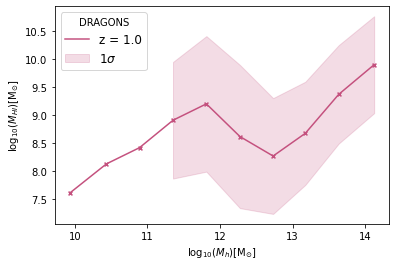

In [20]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
label_sigma1 = ("$1\sigma$")
label_z1 = ("z = " + redshift_used1)


color_used1=np.random.rand(3,)
ax.plot(Mvir_mean1, HIMass_median1, color=color_used1, label=label_z1)
ax.scatter(Mvir_mean1, HIMass_median1, color=color_used1, marker='x', s=15)
ax.fill_between(Mvir_mean1, 
                HIMass_median1 - HIMass_std1, 
                HIMass_median1 + HIMass_std1, 
                alpha=0.2, color =color_used1, label=label_sigma1)

plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

nbins = str(nbins)
name_of_plot=("Alice_MHI_Mvir_" + nbins + "_shaded_z-" + redshift_used1)
plt.savefig("plots/" + name_of_plot + ".pdf")

In [21]:
nbins

'10'

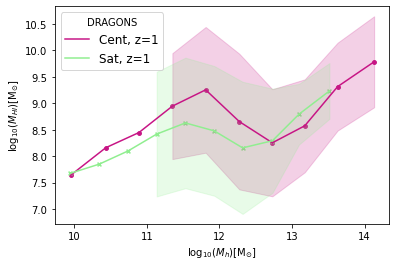

In [22]:
# CENTRALS, SATELLITES AND ORPHANS
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
label_sigma = ("$1\sigma$ for All Galaxies")
label_Cen1=("Cent, z=1")
label_Sat1=("Sat, z=1")
label_Orp1=("Orp, z=1")

ax.plot(Mvir_mean_Cen1, HIMass_median_Cen1, color="mediumvioletred", label=label_Cen1)
ax.plot(Mvir_mean_Sat1, HIMass_median_Sat1, color="lightgreen", label=label_Sat1)
ax.scatter(Mvir_mean_Cen1, HIMass_median_Cen1, color="mediumvioletred", marker='o', s=15)
ax.scatter(Mvir_mean_Sat1, HIMass_median_Sat1, color="lightgreen", marker = 'x', s=15)
#ax.plot(Mvir_mean_Orp, HIMass_median_Orp, color="grey", label=label_Orp0)

'''ax.fill_between(Mvir_mean, 
                HIMass_median - HIMass_std, 
                HIMass_median + HIMass_std, 
                alpha=0.2, color =color_used)
'''
ax.fill_between(Mvir_mean_Cen1, 
                HIMass_median_Cen1 - HIMass_std_Cen1, 
                HIMass_median_Cen1 + HIMass_std_Cen1, 
                alpha=0.2, color ="mediumvioletred")

ax.fill_between(Mvir_mean_Sat1, 
                HIMass_median_Sat1 - HIMass_std_Sat1, 
                HIMass_median_Sat1 + HIMass_std_Sat1, 
                alpha=0.2, color ="lightgreen")

'''
ax.fill_between(Mvir_mean_Orp1, 
                HIMass_median_Orp1 - HIMass_std_Orp1, 
                HIMass_median_Orp1 + HIMass_std_Orp1, 
                alpha=0.2, color ="grey", label=label_sigma)
'''
plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

name_of_plot=("Alice_MHI_Mvir_" + nbins + "_shaded_z-" + redshift_used1 + "Cen_Sat_Orp")
plt.savefig("plots/" + name_of_plot + ".pdf")

# PLOT BOTH
## z = 0 and z = 1

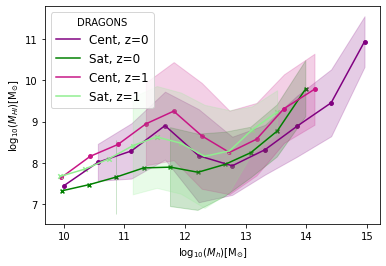

In [23]:
# CENTRALS, SATELLITES AND ORPHANS
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
label_sigma = ("$1\sigma$ for All Galaxies")
label_Cen1=("Cent, z=1")
label_Sat1=("Sat, z=1")
label_Orp1=("Orp, z=1")
label_Cen0=("Cent, z=0")
label_Sat0=("Sat, z=0")
label_Orp0=("Orp, z=0")


ax.plot(Mvir_mean_Cen0, HIMass_median_Cen0, color="purple", label=label_Cen0)
ax.plot(Mvir_mean_Sat0, HIMass_median_Sat0, color="green", label=label_Sat0)
ax.scatter(Mvir_mean_Cen0, HIMass_median_Cen0, color="purple", marker='o', s=15)
ax.scatter(Mvir_mean_Sat0, HIMass_median_Sat0, color="green", marker='x', s=15)
#ax.plot(Mvir_mean_Orp, HIMass_median_Orp, color="grey", label=label_Orp0)

ax.fill_between(Mvir_mean_Cen0, 
                HIMass_median_Cen0 - HIMass_std_Cen0, 
                HIMass_median_Cen0 + HIMass_std_Cen0, 
                alpha=0.2, color ="purple")

ax.fill_between(Mvir_mean_Sat0, 
                HIMass_median_Sat0 - HIMass_std_Sat0, 
                HIMass_median_Sat0 + HIMass_std_Sat0, 
                alpha=0.2, color ="green")


ax.plot(Mvir_mean_Cen1, HIMass_median_Cen1, color="mediumvioletred", label=label_Cen1)
ax.plot(Mvir_mean_Sat1, HIMass_median_Sat1, color="lightgreen", label=label_Sat1)
ax.scatter(Mvir_mean_Cen1, HIMass_median_Cen1, color="mediumvioletred", marker='o', s=15)
ax.scatter(Mvir_mean_Sat1, HIMass_median_Sat1, color="lightgreen", marker='x', s=20)
#ax.plot(Mvir_mean_Orp, HIMass_median_Orp, color="grey", label=label_Orp0)

ax.fill_between(Mvir_mean_Cen1, 
                HIMass_median_Cen1 - HIMass_std_Cen1, 
                HIMass_median_Cen1 + HIMass_std_Cen1, 
                alpha=0.2, color ="mediumvioletred")

ax.fill_between(Mvir_mean_Sat1, 
                HIMass_median_Sat1 - HIMass_std_Sat1, 
                HIMass_median_Sat1 + HIMass_std_Sat1, 
                alpha=0.2, color ="lightgreen")

plt.legend(title=("DRAGONS"),
           loc='upper left',
           fontsize=12)

name_of_plot=("Alice_MHI_Mvir_" + nbins + "_shaded_z-0-1_Cen_Sat")
plt.savefig("plots/" + name_of_plot + ".pdf")

In [24]:
nbins

'10'